# Set 1 - Random Forest Combined Feature Importance

## Importing Libraries

In [1]:
# Data Management
import pandas as pd
import scipy as sp

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Cleaning Metadata

### Curating Metadata

In [2]:
f1 = pd.read_csv('files/PDS000140119.22.tsv', sep = '\t')
f2 = pd.read_csv('files/12838_metadata_biosample.csv')
f3 = f2[['sra_id', 'biosample_id']]
f3 = f3.rename(columns = {'biosample_id':'BioSample',
                          'sra_id':'id'})

d1 = pd.merge(f1, f3, how = 'inner', on = 'BioSample')
d2 = d1[['id', 'Location', 'Isolation source']]

da2 = d2[['id', 'Location']]
da2 = da2.set_index('id')
da2 = da2['Location'].str.split(':', expand = True).add_prefix('name_')
da2 = da2.rename(columns = {'name_0':'Country'})
da2 = da2.drop('name_1', axis = 1)

d3 = pd.merge(d2, da2, how = 'inner', on = 'id')

def replace_country(x):
    if x == 'USA':                     # 7260
        return 'United States'
    elif x == 'United Kingdom':        # 2057
        return 'United Kingdom'
    else:
        return 'Others'
    
d3['Country'] = d3['Country'].apply(replace_country) 
d3['source'] = d3['Isolation source'].str.lower() 

def replace_host(x):
    if x == 'swine':
        return 'Swine'
    elif x == 'sus scrofa':
        return 'Swine'
    elif x == 'sus domesticus':
        return 'Swine'
    elif x == 'pork':
        return 'Swine'
    elif x == 'porcine':
        return 'Swine'
    elif x == 'pig':
        return 'Swine'
    elif x == 'hogs':
        return 'Swine'
    elif x == 'pig at slaughter':
        return 'Swine'
    elif x == 'animal-swine-market swine':
        return 'Swine'
    elif x == 'pork chop':
        return 'Swine'
    elif x == 'intestine (sus scrofa)':
        return 'Swine'
    elif x == 'animal-swine-sow':
        return 'Swine'
    elif x == 'feces (sus scrofa)':
        return 'Swine'
    elif x == 'product-raw-ground, comminuted or otherwise nonintact-pork':
        return 'Swine'
    elif x == 'product-raw-intact-pork':
        return 'Swine'
    elif x == 'raw intact pork':
        return 'Swine'
    elif x == 'pooled tissue (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine tissue pool':
        return 'Swine'
    elif x == 'porcine liver':
        return 'Swine'
    elif x == 'intestine (sus domesticus)':
        return 'Swine'
    elif x == 'sus scrofa domesticus, culture plate':
        return 'Swine'
    elif x == 'pooled ileum (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'intestine (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'small intestine (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'ileum (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'colon (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'swine, livestock, pig':
        return 'Swine'
    elif x == 'animal-swine-market swine (cecal)':
        return 'Swine'
    elif x == 'lung (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'colon(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pig meat':
        return 'Swine'
    elif x == 'swine bacterial strain':
        return 'Swine'
    elif x == 'ground pork':
        return 'Swine'
    elif x == 'feces (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'animal-swine-sow (cecal)':
        return 'Swine'
    elif x == 'spleen (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'liver (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pork chops':
        return 'Swine'
    elif x == 'colon (sus scrofa)':
        return 'Swine'
    elif x == 'roasted pig':
        return 'Swine'
    elif x == 'animal-swine-roaster swine':
        return 'Swine'
    elif x == 'tissue (sus scrofa)':
        return 'Swine'
    elif x == 'feces swine':
        return 'Swine'
    elif x == 'pig intestine (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pig spleen (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pig colon (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pulled pork':
        return 'Swine'
    elif x == 'slaughterhouse pig':
        return 'Swine'
    elif x == 'tissue pool porcine':
        return 'Swine'
    elif x == 'porcine lung':
        return 'Swine'
    elif x == 'porcine intestine (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine lung (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'swine feces':
        return 'Swine'
    elif x == 'boneless pork':
        return 'Swine'
    elif x == 'porcine pooled tissue':
        return 'Swine'
    elif x == 'lymph (sus scrofa)':
        return 'Swine'
    elif x == 'boiled pork with mustard greens':
        return 'Swine'
    elif x == 'raw liver from pork':
        return 'Swine'
    elif x == 'feces porcine':
        return 'Swine'
    elif x == 'porcine colon':
        return 'Swine'
    elif x == 'liver porcine':
        return 'Swine'
    elif x == 'porcine intestine':
        return 'Swine'
    elif x == 'porcine colon (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'raw ground comminuted nonintact pork':
        return 'Swine'
    elif x == 'swine carcass':
        return 'Swine'
    elif x == 'porcine mesenteric lymph node (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine liver (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pork meat':
        return 'Swine'
    elif x == 'porcine fecal swab (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine peritoneal swab (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine intesinte pooled (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine intestinal swab (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine feces':
        return 'Swine'
    elif x == 'raw pork':
        return 'Swine'
    elif x == 'pork sausage':
        return 'Swine'
    elif x == 'porcine fecal swab':
        return 'Swine'
    elif x == 'swine colon':
        return 'Swine'
    elif x == 'porcine pool intestines':
        return 'Swine'
    elif x == 'intestine (porcine)':
        return 'Swine'
    elif x == 'porcine feces (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'porcine lymph node (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pork liver':
        return 'Swine'
    elif x == 'pork kidney':
        return 'Swine'
    elif x == 'pork intestine':
        return 'Swine'
    elif x == 'pork fat':
        return 'Swine'
    elif x == 'feces (sus domesticus)':
        return 'Swine'
    elif x == 'porcine pleural (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'feces (sus scrofa domesticus )':
        return 'Swine'
    elif x == 'pork & cabbage dumplings':
        return 'Swine'
    elif x == 'porcine oral fluid (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'rectal swab (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'caecum (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'tissue pool (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'jejunum porcine':
        return 'Swine'
    elif x == 'mesenteric nodes (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'caecum content (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pig feces':
        return 'Swine'
    elif x == 'farmed pig':
        return 'Swine'
    elif x == 'swine, food, pork':
        return 'Swine'
    elif x == 'rectum (sus scrofa domesticus)':
        return 'Swine'
    elif x == 'spleen porcine':
        return 'Swine'
    elif x == 'stomach porcine':
        return 'Swine'
    elif x == 'pig mechanically separated meat':
        return 'Swine'
    elif x == 'intestine(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'rectal swab(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'lung(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'liver(sus scrofa domesticus)':
        return 'Swine'
    elif x == 'pork carcasses':
        return 'Swine'
    
    elif x == 'human':
        return 'Human'
    elif x == 'human bacterial strain':
        return 'Human'
    elif x == 'human, blood culture':
        return 'Human'
    elif x == 'human, faeces':
        return 'Human'
    elif x == 'human, other':
        return 'Human'
    elif x == 'human, stool':
        return 'Human'
    elif x == 'human, urine':
        return 'Human'
    elif x == 'stool':
        return 'Human'
    elif x == 'clinical sample':
        return 'Human'
    elif x == 'blood':
        return 'Human'
    
    elif x == 'turkey':
        return 'Poultry'
    elif x == 'chicken':
        return 'Poultry'
    elif x == 'comminuted turkey':
        return 'Poultry'
    elif x == 'hen bacterial strain':
        return 'Poultry'
    elif x == 'chicken bacterial strain':
        return 'Poultry'
    elif x == 'feces (gallus gallus domesticus)':
        return 'Poultry'
    elif x == 'animal-turkey-young turkey':
        return 'Poultry'
    elif x == 'poultry':
        return 'Poultry'
    elif x == 'raw intact chicken':
        return 'Poultry'
    elif x == 'ground turkey':
        return 'Poultry'
    elif x == 'nrte (not-ready-to-eat) comminuted poultry exploratory sampling - turkeys':
        return 'Poultry'
    elif x == 'animal-turkey-young turkey (cecal)':
        return 'Poultry'
    elif x == 'ground chicken':
        return 'Poultry'
    elif x == 'animal-turkey-turkey carcass sponge':
        return 'Poultry'
    elif x == 'chicken - young chicken carcass rinse (pre-evisceration)':
        return 'Poultry'
    elif x == 'turkey fluff':
        return 'Poultry'
    elif x == 'turkey carcass sponge':
        return 'Poultry'
    elif x == 'ground component turkey':
        return 'Poultry'
    elif x == 'ground component chicken':
        return 'Poultry'
    elif x == 'comminuted poultry turkey':
        return 'Poultry'
    elif x == 'turkey intestine (meleagris gallopavo)':
        return 'Poultry'
    elif x == 'chicken caecum pre-harvest poultry':
        return 'Poultry'
    elif x == 'chicken carcass':
        return 'Poultry'
    elif x == 'comminuted chicken':
        return 'Poultry'
    elif x == 'animal-chicken-young chicken':
        return 'Poultry'
    elif x == 'chicken meat':
        return 'Poultry'
    elif x == 'poultry meat':
        return 'Poultry'
    elif x == 'finished ground turkey':
        return 'Poultry'
    elif x == 'retail ground turkey':
        return 'Poultry'
    elif x == 'chicken breasts':
        return 'Poultry'
    elif x == 'turkey intestine':
        return 'Poultry'
    elif x == 'poultry manure':
        return 'Poultry'
    elif x == 'chicken breast':
        return 'Poultry'
    elif x == 'chicken whole - cut in lab':
        return 'Poultry'
    elif x == 'turkey fluff (meleagris gallopavo)':
        return 'Poultry'
    elif x == 'chicken whole-cut in lab':
        return 'Poultry'
    elif x == 'turkey faeces':
        return 'Poultry'
    
    elif x == 'product-raw-intact-beef':
        return 'Bovine'
    elif x == 'animal-cattle-beef cow':
        return 'Bovine'
    elif x == 'animal-cattle-dairy cow':
        return 'Bovine'
    elif x == 'animal-cattle-dairy cow (cecal)':
        return 'Bovine'
    elif x == 'animal-calf-bob veal (cecal)':
        return 'Bovine'
    elif x == 'animal-cattle-steer (cecal)':
        return 'Bovine'
    elif x == 'intestine (bos taurus)':
        return 'Bovine'
    elif x == 'feces (bos taurus)':
        return 'Bovine'
    elif x == 'cattle':
        return 'Bovine'
    elif x == 'bovine bacterial strain':
        return 'Bovine'
    elif x == 'buffalo bacterial strain':
        return 'Bovine'
    elif x == 'calf bacterial strain':
        return 'Bovine'
    elif x == 'beef':
        return 'Bovine'
    elif x == 'comminuted beef':
        return 'Bovine'
    elif x == 'tissue pool (bos taurus)':
        return 'Bovine'
    elif x == 'calf feces':
        return 'Bovine'
    elif x == 'jersey calf':
        return 'Bovine'
    elif x == 'calf lymph node':
        return 'Bovine'
    elif x == 'calf small intestine':
        return 'Bovine'
    elif x == 'animal-calf-bob veal':
        return 'Bovine'
    elif x == 'rte product-beef corndog':
        return 'Bovine'
    elif x == 'bovine brain (bos taurus)':
        return 'Bovine'
    elif x == 'animal-cattle-steer':
        return 'Bovine'
    elif x == 'pooled tissue (bos taurus)':
        return 'Bovine'
    elif x == 'pooled tissue (bos taurus)':
        return 'Bovine'
    elif x == 'boneless beef':
        return 'Bovine'
    elif x == 'raw intact beef':
        return 'Bovine'
    elif x == 'bovine fecal swab (bos taurus)':
        return 'Bovine'
    elif x == 'bovine lung (bos taurus)':
        return 'Bovine'
    elif x == 'bovine lymph node (bos taurus)':
        return 'Bovine'
    elif x == 'bovine intestine':
        return 'Bovine'
    elif x == 'biological fluid or and tissue bovine':
        return 'Bovine'
    elif x == 'intestines (bovine)':
        return 'Bovine'
    elif x == 'feces bovine':
        return 'Bovine'
    elif x == 'bovine mesenteric lymph node':
        return 'Bovine'
    elif x == 'ground beef':
        return 'Bovine'
    elif x == 'bovine':
        return 'Bovine'
    elif x == 'bovine manure':
        return 'Bovine'
    elif x == 'liver (bos taurus)':
        return 'Bovine'
    elif x == 'food [ground beef]':
        return 'Bovine'

    else:
        return 'Others'
    
d3['Source'] = d3['source'].apply(replace_host)

md_epi1 = d3[['id', 'Country', 'Source']]        # 11811

## Read files 
st = pd.read_csv('files/mlst_output.csv')        # 12230
cgmlst = pd.read_csv('files/sistr_output.csv')   # 12230

## Clean up ST data
st = st.rename(columns = {'FILE':'id'})
st1 = st[['id', 'ST']]

def replace_st(x):
    if x == '34':          # 11273
        return 'ST34'
    else:
        return 'Others'
    
st1['ST'] = st1['ST'].apply(replace_st)

## Clean up cgMLST data
cgmlst = cgmlst[['cgmlst_ST', 'genome', 'serovar_antigen']]
cgmlst = cgmlst.rename(columns = {'cgmlst_ST':'cgMLST',
                                  'genome':'id',
                                  'serovar_antigen':'serovar'})
cgmlst = cgmlst[['id', 'cgMLST', 'serovar']]

def replace_serovar(x):
    if x == 'I 1,4,[5],12:i:-':
        return 'I 1,4,[5],12:i:-'
    else:
        return 'Others'
    
cgmlst['Serovar'] = cgmlst['serovar'].apply(replace_serovar)
cgmlst = cgmlst.drop(['serovar', 'cgMLST'], axis = 1)

md1 = pd.merge(st1, cgmlst, how = 'inner', on = 'id')
md1 = md1[['id', 'Serovar', 'ST']]

md2 = pd.merge(md1, md_epi1, how = 'inner', on =  'id')

## Apply filters (before filters 11656, after 1447)

## Keep only ST34 (before 11656, after 10736)
md2 = md2.loc[md2['ST'] == 'ST34']

## Drop ST34 if not monophasic (before 10736, after 10721)
md2 = md2.loc[~(md2['Serovar'] == 'Others')]

## Keep only USA (before 10721, after 6428)
md2 = md2.loc[md2['Country'] == 'United States']

## Keep only Human and Swine (before 6428, after 1447)
md2 = md2.loc[md2['Source'].isin(['Human', 'Swine'])]

C:\Users\steph\AppData\Local\Temp\ipykernel_28964\1869639788.py:445: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st1['ST'] = st1['ST'].apply(replace_st)


### Curating Rtab file

In [3]:
rtab_1 = pd.read_csv('files/gene_presence_absence.Rtab', sep = '\t')
rtab_1 = rtab_1.set_index('Gene')
rtab_1 = rtab_1.transpose()

rtab_2 = rtab_1.reset_index()
rtab_2 = rtab_2.rename(columns = {'index':'id'})

## Extract unique ids for Rtab curation
unique_id = md2['id']

rtab = pd.merge(unique_id, rtab_2, how = 'inner', on =  'id')
rtab = rtab.set_index('id')

### Final Metadata

In [4]:
## ignore all hypothetical genes (genes that start with group_)
j1 = rtab.loc[:,~rtab.columns.str.startswith('group_')]
j2 = j1.sum()

## Find shell genes (15 - 95%)
j3 = (j2/j1.shape[0]) * 100
j3 = j3.rename('prop')
j3 = j3.reset_index()

sg = j3.loc[(j3['prop'] >= 15) & (j3['prop'] < 95)]
sg = sg.rename(columns = {'index':'Gene'})
sg = sg.set_index('Gene')

j4 = j1.transpose()
j4 = j4.reset_index()
j4 = j4.rename(columns = {'index':'Gene'})
j5 = pd.merge(j4, sg, how = 'inner', on = 'Gene')
j5 = j5.drop('prop', axis = 1)
j5 = j5.set_index('Gene')
j5 = j5.transpose()
j5 = j5.reset_index()
j5 = j5.rename(columns = {'index':'id'})

coln = j5.columns
first = coln[1] # sopD2
last = coln[-1] # pspF_2

## Filter out genes with counts higher than 1
j6 = pd.melt(j5, id_vars = ['id'], value_vars = list(coln[1:-1]))
j6 = j6.loc[j6['value'] <= 1]

## Spread the data
j7 = j6.pivot(index = ['id'], columns = ['Gene'])
j7 = j7.droplevel(0, axis = 1)

metadata = pd.merge(md2, j7, how = 'inner', on = 'id')
# metadata ## 1447 rows

## Plasmids

In [5]:
# Get plasmid data
x1 = pd.read_csv('files/abricate_output_plasmidfinder.csv')
x1 = x1.rename(columns = {'#FILE':'id', 'GENE':'Gene'})
x2 = x1[['id', 'Gene', '%COVERAGE', '%IDENTITY']]

## Threshold stablished (filters keep everything below the first quartile out)
xa2 = x2.loc[((x2['%COVERAGE'] >= 99) & (x2['%IDENTITY'] >= 88))]
x2 = xa2[['id', 'Gene']]

x3 = x2.groupby(['id', 'Gene']).size()
x3 = x3.reset_index()
x3 = x3.rename(columns = {0:'n'})

## Eliminating genes with counts higher than 1
x3 = x3.loc[x3['n'] == 1]

## Spreading data
x4 = x3.pivot(index = ['id'], columns = ['Gene'])

## Replacing NaN with 0
x4 = x4.fillna(0)
x4 = x4.droplevel(0, axis = 1)
x4 = x4.reset_index()

md = metadata[['id', 'Source']]

pls = pd.merge(md, x4, how = 'inner', on = 'id')
plasmids = pls.set_index('id')


## AMR - Resfinder

In [6]:
# Get Resfinder Data
x1 = pd.read_csv('files/abricate_output_resfinder.csv')
x1 = x1.rename(columns = {'#FILE':'id', 'GENE':'Gene'})
x2 = x1[['id', 'Gene', '%COVERAGE', '%IDENTITY']]

## Threshold stablished (filters keep everything below the first quartile out)
xa2 = x2.loc[((x2['%COVERAGE'] == 100) & (x2['%IDENTITY'] == 100))]
x2 = xa2[['id', 'Gene']]

x3 = x2.groupby(['id', 'Gene']).size()
x3 = x3.reset_index()
x3 = x3.rename(columns = {0:'n'})

## Eliminating genes with counts higher than 1
x3 = x3.loc[x3['n'] == 1]

## Spreading data
x4 = x3.pivot(index = ['id'], columns = ['Gene'])

## Replacing NaN with 0
x4 = x4.fillna(0)
x4 = x4.droplevel(0, axis = 1)
x4 = x4.reset_index()

md = metadata[['id', 'Source']]

amr_res = pd.merge(md, x4, how = 'inner', on = 'id')
resfinder = amr_res.set_index('id')

## Major Differenciating Annotated Shell Genes

In [7]:
# Create DataFrame for Shell Genes
shell_genes = metadata.drop(['Serovar', 'ST', 'Country'], axis = 1).set_index('id')


In [ ]:
merge1 = pd.merge(plasmids, resfinder, how = 'right', on = ['id', 'Source'])
total_genes = pd.merge(merge1, shell_genes, how = 'right', on = ['id', 'Source'])

X_total = total_genes.drop('Source', axis = 1)
y_total = total_genes['Source']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy_before = rf.score(X_test, y_test)
print(f'Accuracy before feature selection: {accuracy_before:.2f}')

# Extract feature importances
importances = rf.feature_importances_
feature_names = X_total.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
# print(feature_importance_df)

# Select top 10 features
top_features = feature_importance['Feature'][:10].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Train the Random Forest model with selected features
rf_selected = RandomForestClassifier(n_estimators = 50, random_state = 42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate the model
accuracy_after = rf_selected.score(X_test_selected, y_test)
print(f'Accuracy after feature selection: {accuracy_after:.2f}')

total_rf_70 = feature_importance

pls_names = plasmids.columns
res_names = resfinder.columns
sg_names = shell_genes.columns

# Combine arrays with their names
array_mapping = {
    name: "Plasmids" for name in pls_names
}
array_mapping.update({
    name: "AMR ResFinder" for name in res_names
})
array_mapping.update({
    name: "Shell Genes" for name in sg_names
})

total_rf_70['Source Data'] = total_rf_70['Feature'].map(array_mapping)

total_rf = total_rf_70.sort_values(by = 'Importance', ascending = False)
total_rf = total_rf.iloc[:20]

Accuracy before feature selection: 0.75
Accuracy after feature selection: 0.72


## Figure

C:\Users\steph\AppData\Local\Temp\ipykernel_28964\2540288146.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  rf_plot = sns.barplot(total_rf, x = 'Importance', y = 'Feature', hue = 'Source Data',


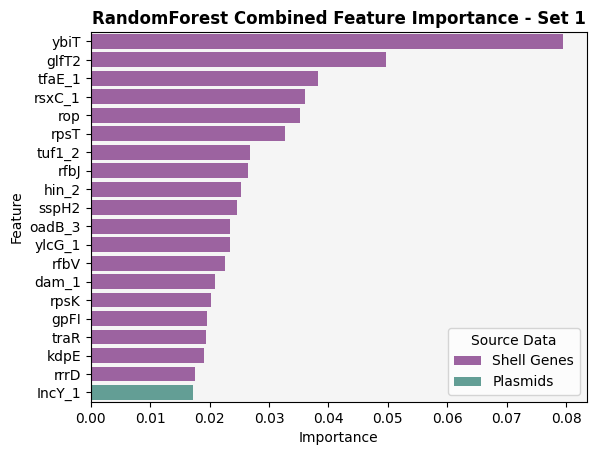

In [9]:
colors = ['#a559aa', '#59a89c', '#f0c571']

# Shell Genes
rf_plot = sns.barplot(total_rf, x = 'Importance', y = 'Feature', hue = 'Source Data', 
                       palette = colors)


# sg_plot.set_title('idk yet')
rf_plot.set(xlabel = None, ylabel = None)
rf_plot.set_facecolor('whitesmoke')


rf_plot.set_title('RandomForest Combined Feature Importance - Set 1', fontweight = 'bold')
rf_plot.set(xlabel = 'Importance', ylabel = 'Feature')
rf_plot.set_facecolor('whitesmoke')
        
plt.show()